In [1]:
# airline time series analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('/Users/juliamancuso/Desktop/Datasets/air traffic.csv')

In [4]:
df.head()

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [6]:
# let's make our variables numeric 
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    int64  
 3   Int_Pax  249 non-null    int64  
 4   Pax      249 non-null    int64  
 5   Dom_Flt  249 non-null    int64  
 6   Int_Flt  249 non-null    int64  
 7   Flt      249 non-null    int64  
 8   Dom_RPM  249 non-null    int64  
 9   Int_RPM  249 non-null    int64  
 10  RPM      249 non-null    int64  
 11  Dom_ASM  249 non-null    int64  
 12  Int_ASM  249 non-null    int64  
 13  ASM      249 non-null    int64  
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(14)
memory usage: 33.2 KB


In [8]:
# since we are doing a time series forecasting, lets handle the month & year columns now
# here we will combine the month and year, while setting the day to the first of the month
df['Date'] = pd.to_datetime({'year': df['Year'], 'month': df['Month'], 'day': 1})

In [9]:
# let's set the date as the index 
df.set_index('Date')

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
Date,,,,,,,,,,,,,,,,,
2003-01-01,2003,1,43032450,4905830,47938280,785160,57667,842827,36211422,12885980,49097402,56191300,17968572,74159872,64.44,71.71,66.20
2003-02-01,2003,2,41166780,4245366,45412146,690351,51259,741610,34148439,10715468,44863907,50088434,15587880,65676314,68.18,68.74,68.31
2003-03-01,2003,3,49992700,5008613,55001313,797194,58926,856120,41774564,12567068,54341633,57592901,17753174,75346075,72.53,70.79,72.12
2003-04-01,2003,4,47033260,4345444,51378704,766260,55005,821265,39465980,10370592,49836572,54639679,15528761,70168440,72.23,66.78,71.02
2003-05-01,2003,5,49152352,4610834,53763186,789397,55265,844662,41001934,11575026,52576960,55349897,15629821,70979718,74.08,74.06,74.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,2023,5,71423653,10358666,81782319,667331,71924,739255,66743565,26805432,93548998,77821407,31950687,109772094,85.77,83.90,85.22
2023-06-01,2023,6,72482621,11544505,84027126,661293,75279,736572,68789127,29883465,98672591,78058358,33410671,111469028,88.13,89.44,88.52
2023-07-01,2023,7,75378157,12432615,87810772,684939,79738,764677,72267904,31376000,103643904,81986010,35326191,117312202,88.15,88.82,88.35


In [10]:
# time to visualize

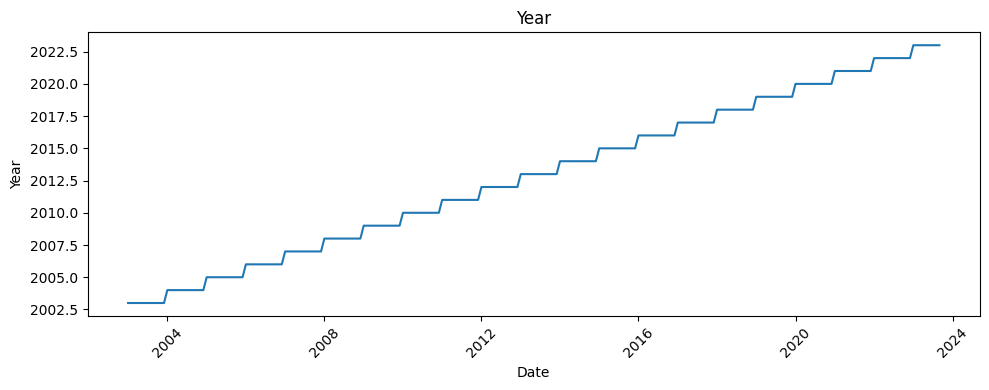

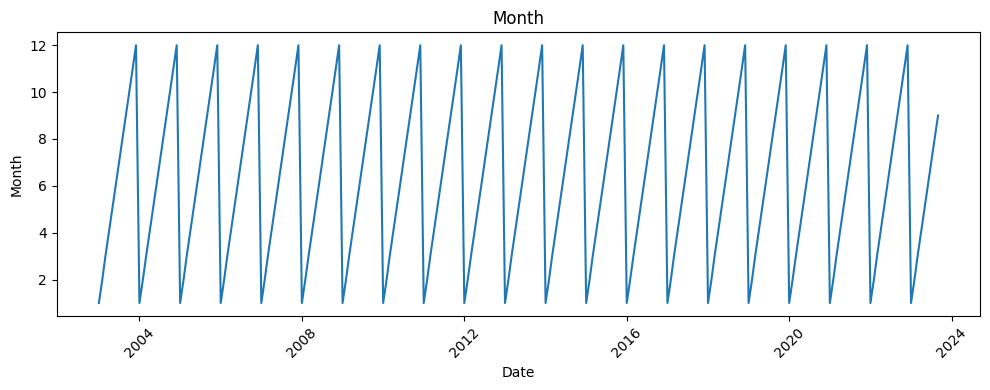

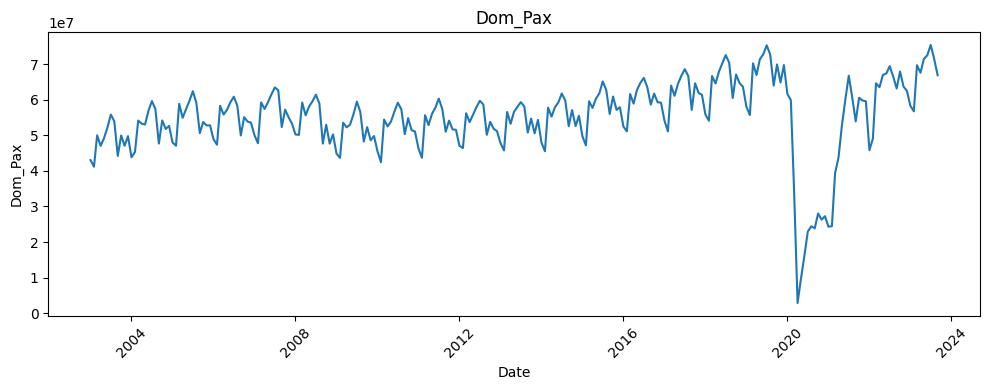

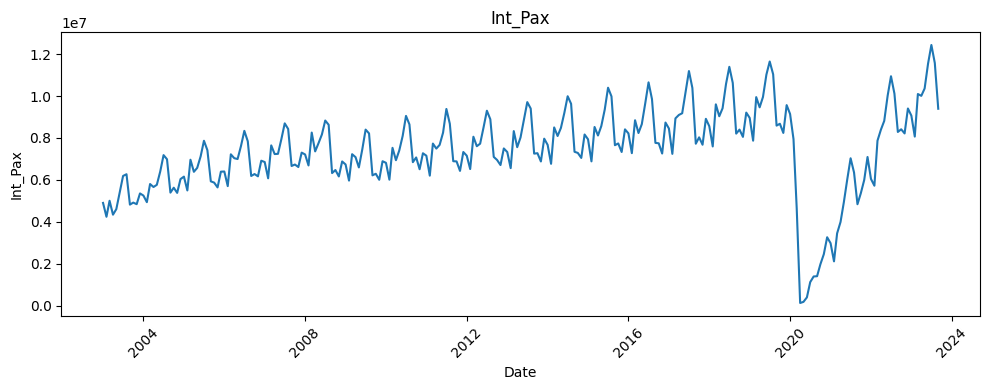

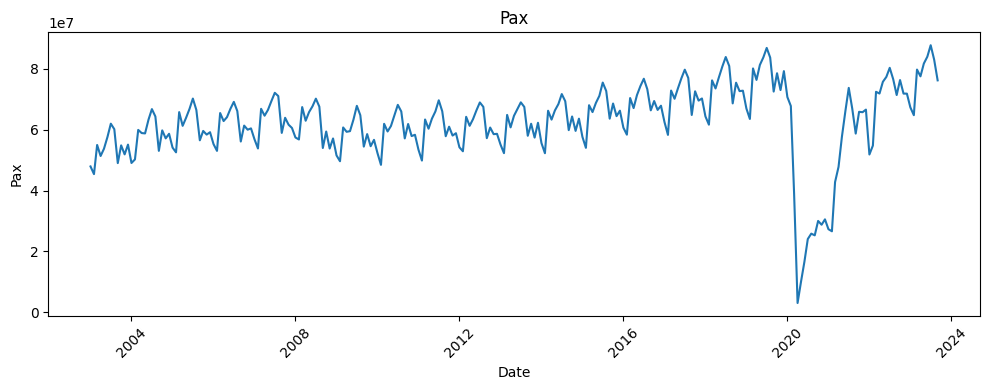

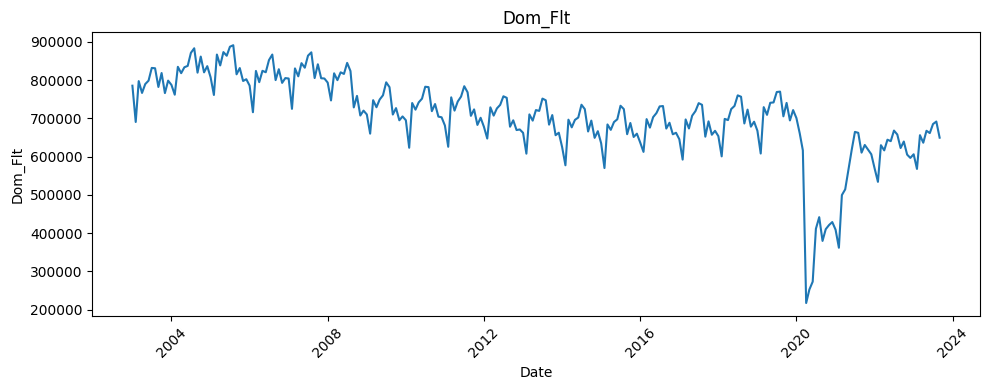

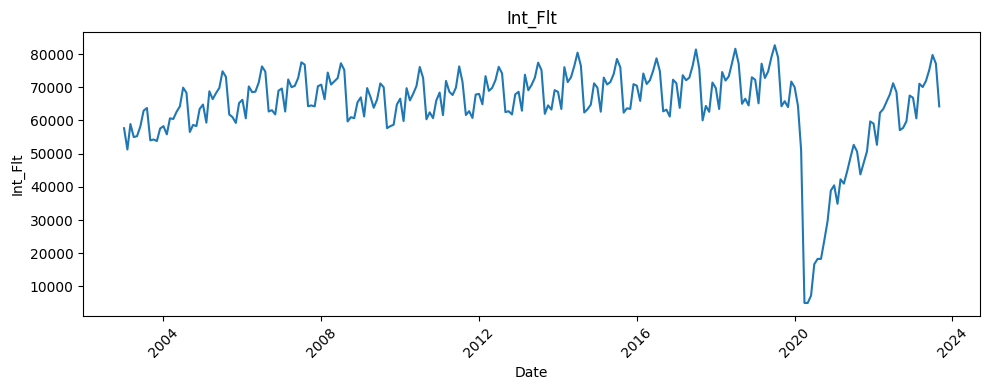

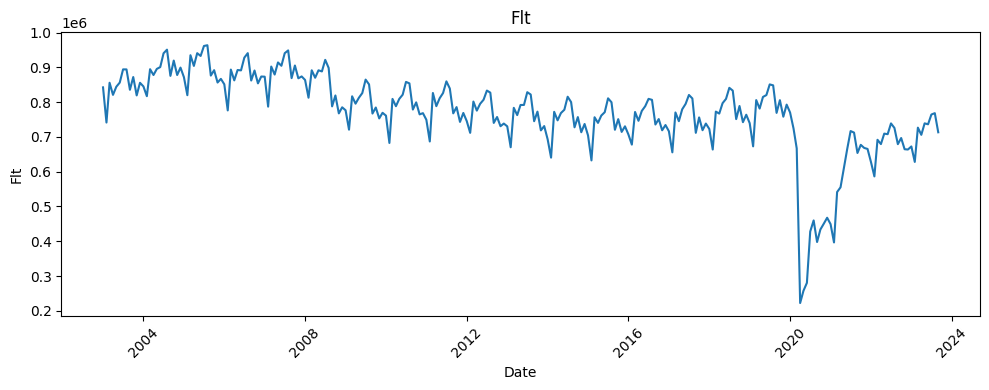

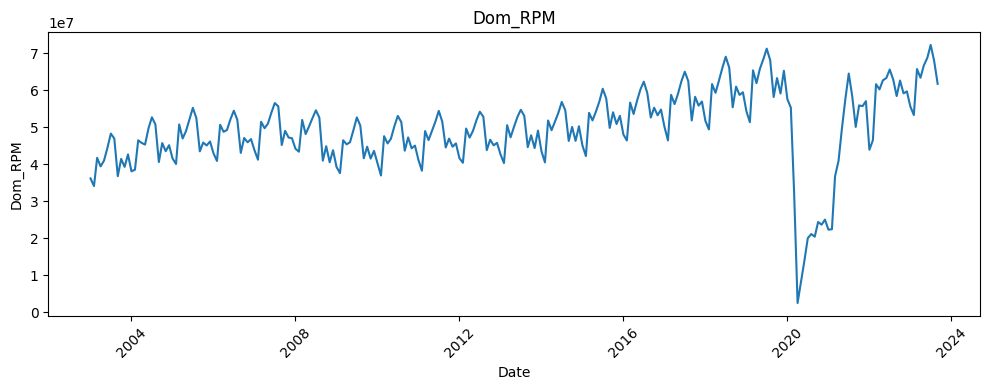

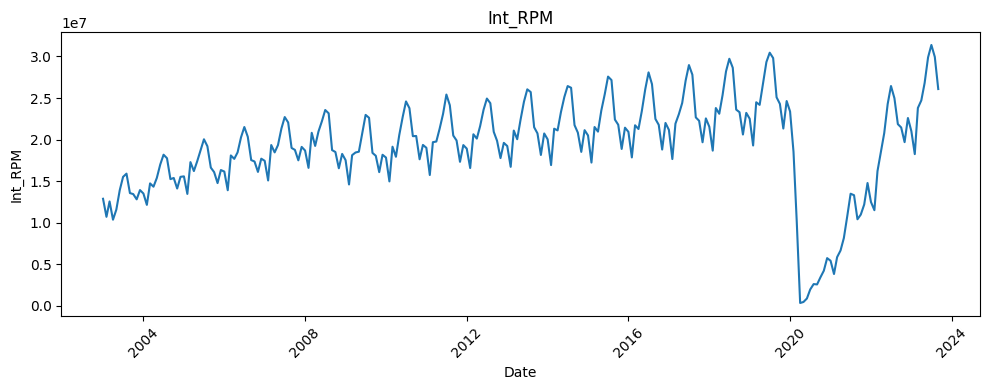

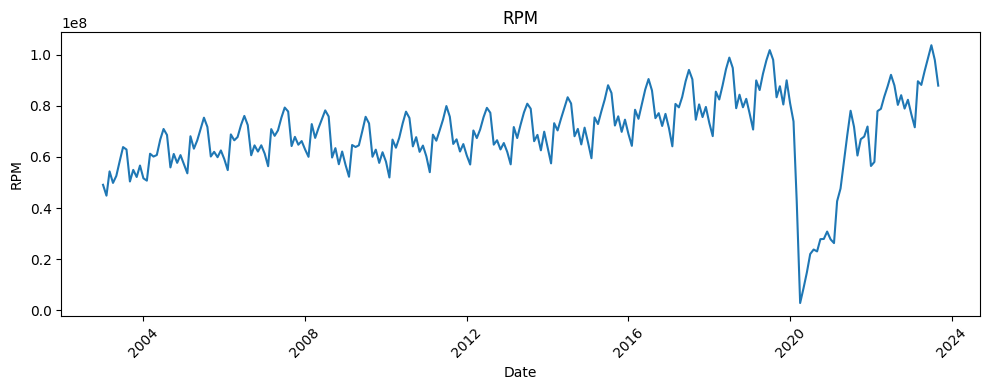

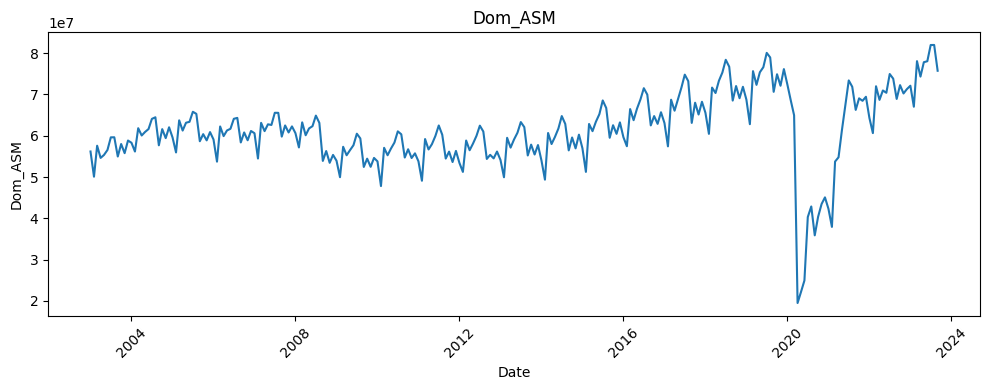

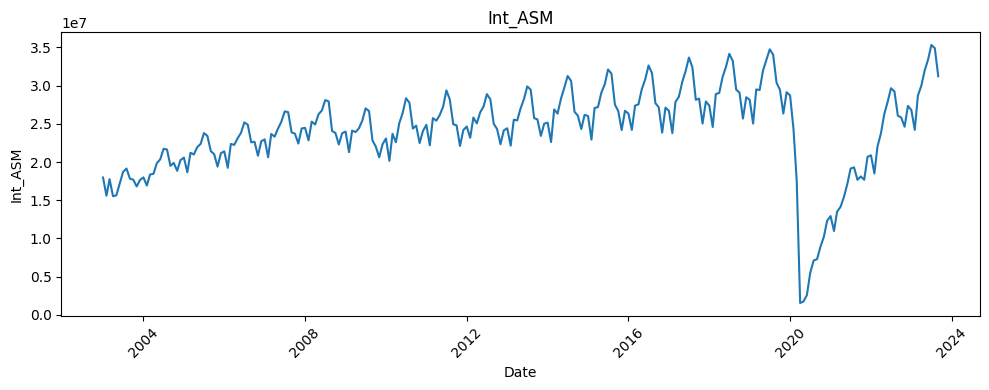

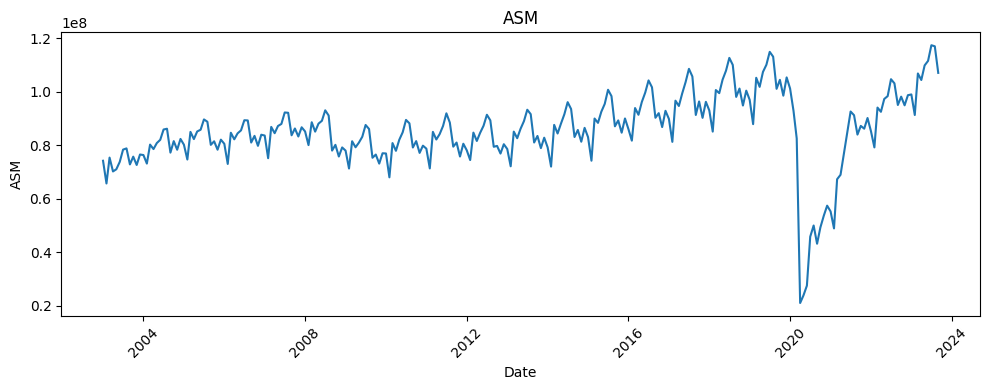

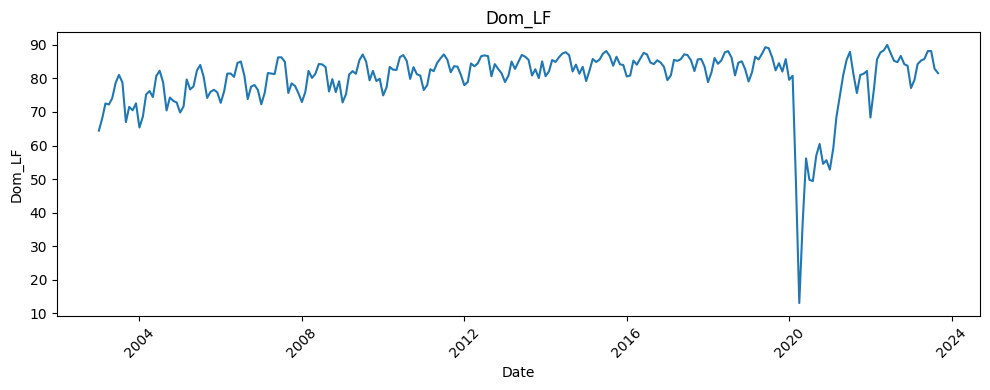

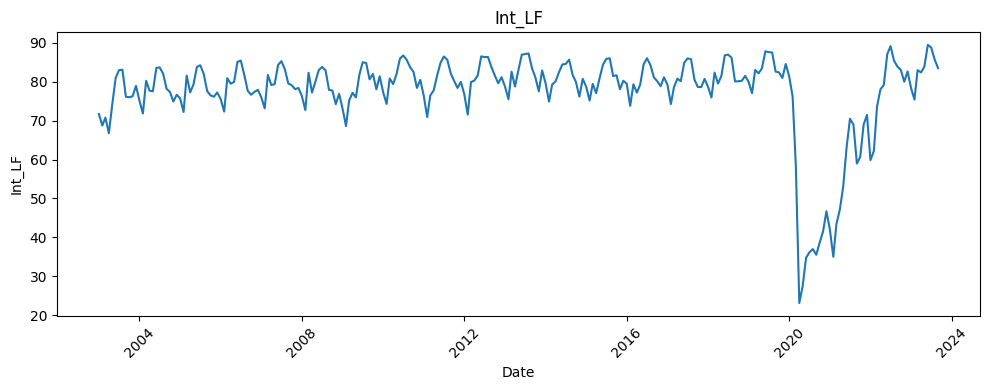

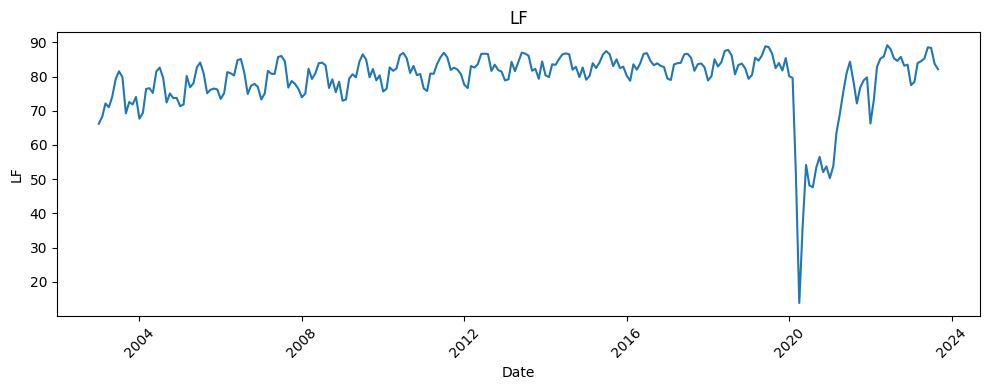

In [11]:
# lets see the trends of all the variables with respect to the date 
all_columns = [col for col in df.columns if col != 'Date']
for column in all_columns:
    plt.figure(figsize=(10, 4))  
    sns.lineplot(data=df, x='Date', y=column)
    plt.title(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
# lets look at the variable of interest more closely

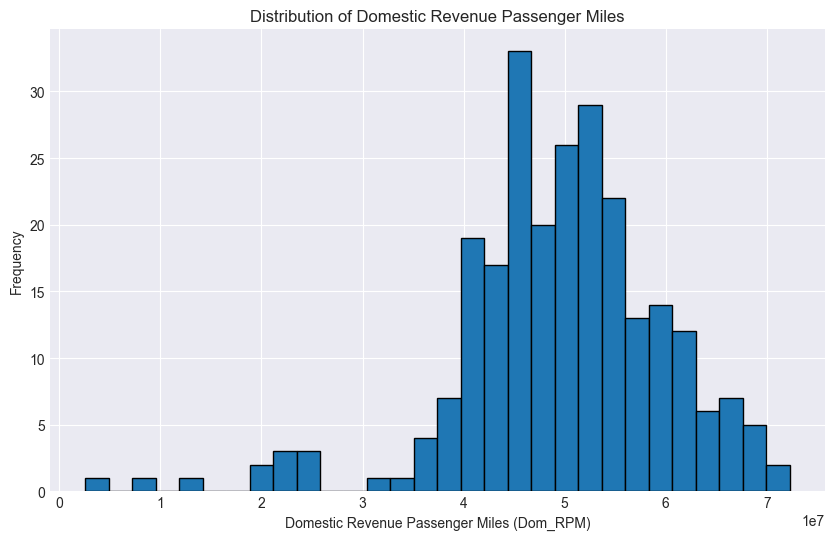

In [13]:
plt.style.use('seaborn-darkgrid')  
plt.figure(figsize=(10, 6))
df['Dom_RPM'].plot(kind='hist', bins=30, edgecolor='black')  
plt.title('Distribution of Domestic Revenue Passenger Miles')
plt.xlabel('Domestic Revenue Passenger Miles (Dom_RPM)')
plt.ylabel('Frequency')
plt.show()

In [14]:
# for thise time series project we are going to forecast Dom_RPM: Domestic Revenue Passenger Miles 
# A measure of airline traffic that calculates the number of miles flown by paying passengers on domestic flights. 
# It's a key performance indicator for airlines, showing the volume of paid passenger travel within the country.

In [15]:
# so lets make a new & simpler df to work with 
new_df = df[['Date', 'Dom_RPM']].copy()
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.set_index('Date', inplace=True)

In [16]:
# Split the data into training and testing sets
split_date = pd.to_datetime('2023-01-01')  
train = new_df.loc[:split_date]  
test = new_df.loc[split_date:]   

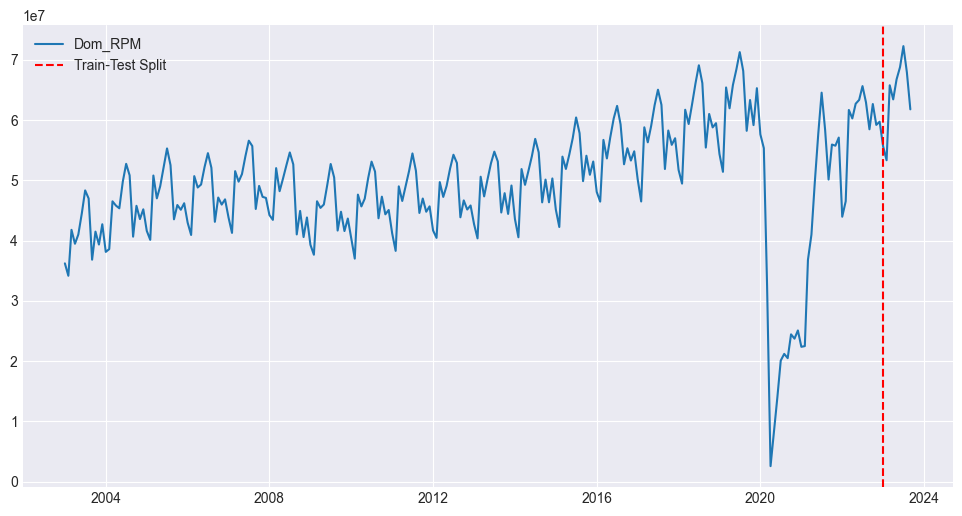

In [17]:
plt.figure(figsize=(12,6))
plt.plot(new_df.index, new_df['Dom_RPM'], label='Dom_RPM')
plt.axvline(x=split_date, color='red', linestyle='--', label='Train-Test Split')
plt.legend()
plt.show()

In [18]:
# stationarity check
from statsmodels.tsa.stattools import adfuller
st_train= adfuller(train['Dom_RPM'], autolag='AIC')
print(st_train)

(-3.4226696016299547, 0.01020991901120415, 13, 227, {'1%': -3.4594900381360034, '5%': -2.8743581895178485, '10%': -2.573601605503697}, 7463.150034343683)


Text(0.5, 1.0, "Autocorrelation Plot for 'Training Set'")

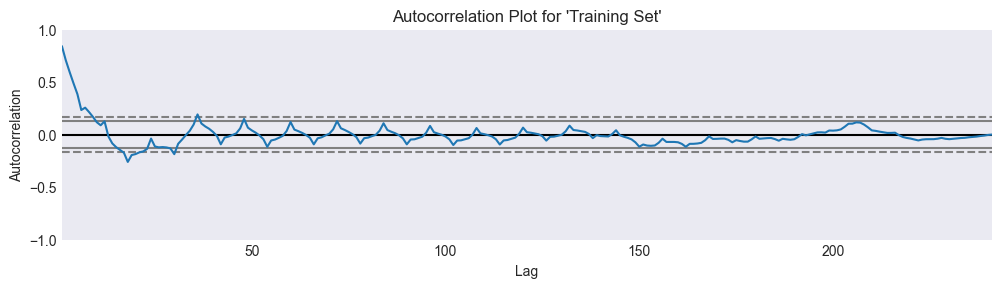

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
pd.plotting.autocorrelation_plot(train['Dom_RPM'])
plt.title(f"Autocorrelation Plot for 'Training Set'")

In [20]:
# differencing the training data 
train['Dom_RPM_diff'] = train['Dom_RPM'].diff().shift(-1)

In [21]:
train['Dom_RPM_diff'].isnull().sum()

1

In [22]:
train.tail()

,Dom_RPM,Dom_RPM_diff
Date,,
2022-09-01,58463970,4192893.0
2022-10-01,62656863,-3462566.0
2022-11-01,59194297,530209.0
2022-12-01,59724506,-4096763.0
2023-01-01,55627743,NaN


In [23]:
train = train.dropna()

In [24]:
# checking ADF reults after differencing
diff_st_train= adfuller(train['Dom_RPM'], autolag='AIC')
print(diff_st_train)

(-3.5346244529761255, 0.007141138016109221, 13, 226, {'1%': -3.4596204846395824, '5%': -2.8744153028455948, '10%': -2.5736320761218576}, 7429.093256516401)


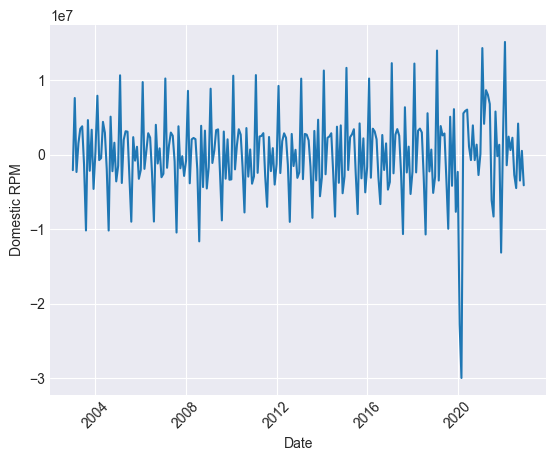

In [25]:
plt.plot(train.index, train['Dom_RPM_diff'])
plt.xlabel('Date')
plt.ylabel('Domestic RPM')
plt.xticks(rotation=45)
plt.show()

In [26]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [27]:
order = (1, 1, 1)
arima_model = sm.tsa.arima.ARIMA(train['Dom_RPM_diff'].dropna(), order=order)  
fitted = arima_model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:           Dom_RPM_diff   No. Observations:                  240
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4058.061
Date:                Thu, 01 Feb 2024   AIC                           8122.122
Time:                        01:02:25   BIC                           8132.552
Sample:                    01-01-2003   HQIC                          8126.325
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0813      0.052     -1.571      0.116      -0.183       0.020
ma.L1         -0.9967      0.076    -13.055      0.000      -1.146      -0.847
sigma2      4.056e+13    1.3e-15   3.11e+28      0.0

In [28]:
import statsmodels.api as sm

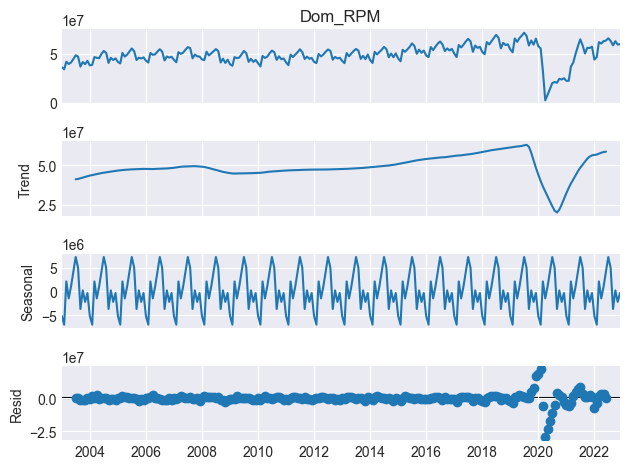

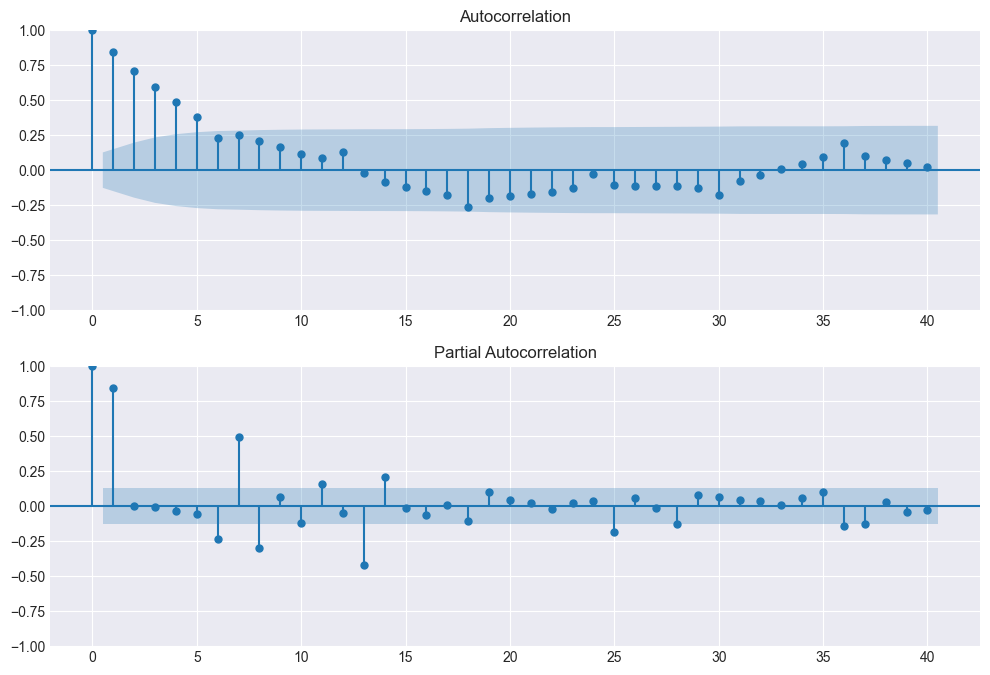

In [29]:
# decompose the time series to observe seasonal patterns
decomposition = sm.tsa.seasonal_decompose(train['Dom_RPM'], model='additive', period=12)  
decomposition.plot()
plt.show()

# ACF & PACF plots
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
sm.graphics.tsa.plot_acf(train['Dom_RPM'], lags=40, ax=ax1)  
sm.graphics.tsa.plot_pacf(train['Dom_RPM'], lags=40, ax=ax2)  
plt.show()


In [30]:
# non seasonal order 
p = 1 # number of lag observations in the model (AR term)
d = 1 # the number of times that the raw observations are differenced (I term)
q = 0  # the size of the moving average window (MA term)

# sasonal order
P = 0  # seasonal autoregressive order
D = 1  # essasonal differencing order
Q = 1  # seasonal moving average order
s = 12 # the number of periods in a season
seasonal_order = (P, D, Q, s)

In [31]:
sarima_model = sm.tsa.statespace.SARIMAX(train['Dom_RPM'],
                                          order=(p, d, q),
                                          seasonal_order=seasonal_order,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

fitted_sarima = sarima_model.fit()
print(fitted_sarima.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76948D+01    |proj g|=  6.32188D+01

At iterate    5    f=  1.47819D+01    |proj g|=  2.95769D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   7.104D-07   1.478D+01
  F =   14.781890403969346     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                       
Dep. Variable:                         

 This problem is unconstrained.


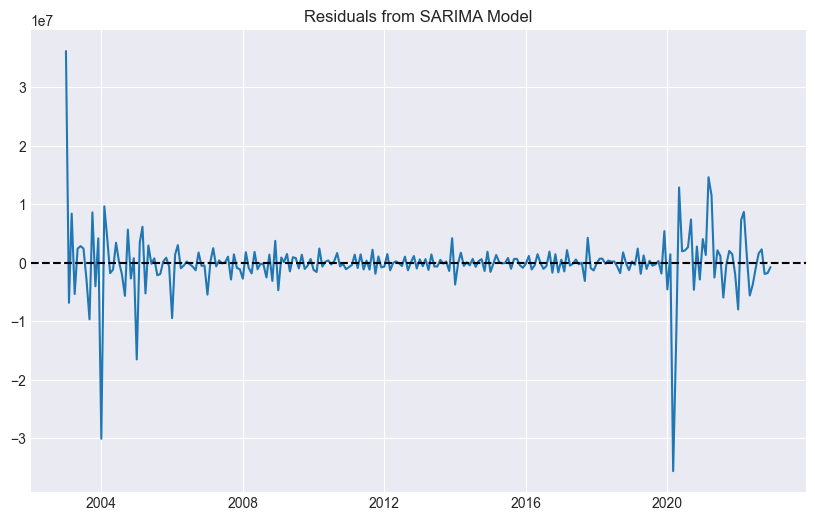

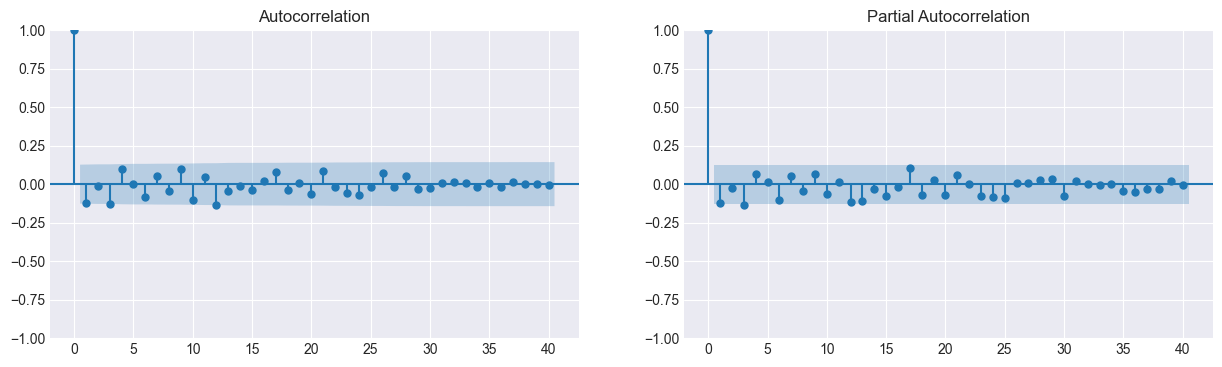

In [32]:
residuals = fitted_sarima.resid

# Plot the residuals
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals from SARIMA Model')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()# Plot ACF and PACF of the residuals
fig, ax = plt.subplots(1,2,figsize=(15,4))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
plt.show()

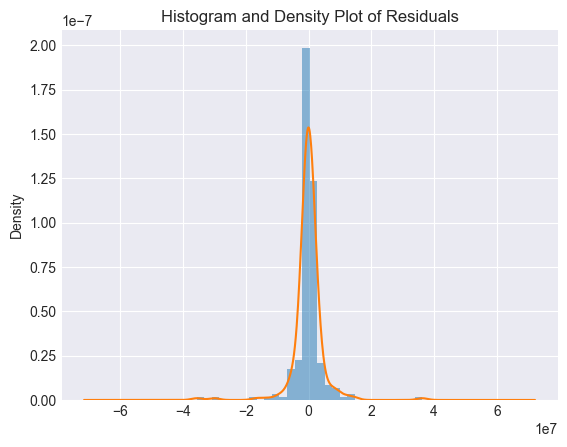

In [33]:
 # histogram and kernel density estimate
residuals.plot(kind='hist', density=True, bins=30, alpha=0.5)
residuals.plot(kind='kde')
plt.title('Histogram and Density Plot of Residuals')
plt.show()

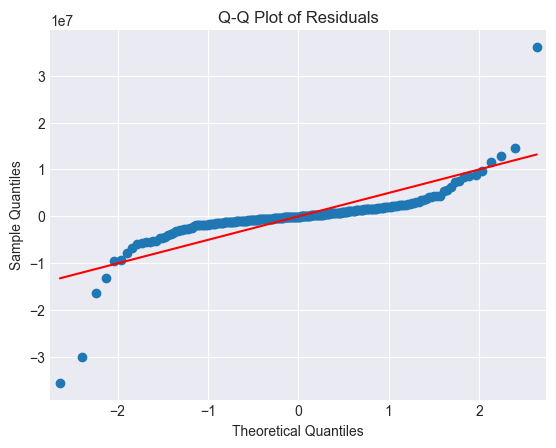

In [34]:
# Q-Q plot to check for normality
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [35]:
# statistical tests for normality
from scipy import stats
jb_test = stats.jarque_bera(residuals)
print(f'Jarque-Bera test statistics: {jb_test[0]}, p-value: {jb_test[1]}')

Jarque-Bera test statistics: 6792.539958715165, p-value: 0.0


In [36]:
# statistical test for zero mean
mean_test = stats.ttest_1samp(residuals, 0)
print(f'Test Statistic: {mean_test.statistic}, p-value: {mean_test.pvalue}')

Test Statistic: -0.10122397254825494, p-value: 0.919457533923656


In [37]:
# statistical test for autocorrelation
ljung_box_test = sm.stats.acorr_ljungbox(residuals, lags=[40], return_df=True)
print(ljung_box_test)

      lb_stat  lb_pvalue
40  35.096743   0.690385


In [38]:
covid_start = '2020-03-01'  
covid_end = '2021-09-01'    

# creating a dummy variable for the covid period
train['covid_dummy'] = np.where((train.index >= covid_start) & (train.index <= covid_end), 1, 0)
# SARIMA model with an exogenous variable (the dummy variable)
sarimax_model1 = sm.tsa.statespace.SARIMAX(train['Dom_RPM'],
                                           exog=train['covid_dummy'],
                                           order=(p, d, q),
                                           seasonal_order=(P, D, Q, s),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)

fitted_sarimax1 = sarimax_model1.fit()
print(fitted_sarimax1.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50425D+01    |proj g|=  5.12549D+00

At iterate    5    f=  1.46920D+01    |proj g|=  8.23735D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   2.977D-06   1.469D+01
  F =   14.691945172187129     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                       
Dep. Variable:                         

 This problem is unconstrained.


In [39]:
# lets try again but with decay
covid_start = pd.to_datetime('2020-03-01')
covid_end = pd.to_datetime('2021-09-01')
# calculating the number of days since the start of COVID-19 and convert to months by dividing by 30
train['months_since_covid'] = ((train.index - covid_start) / np.timedelta64(1, 'D') / 30).astype(int)
# linear decay
duration_in_months = ((covid_end - covid_start) / np.timedelta64(1, 'D') / 30)
train['covid_impact'] = train['months_since_covid'].apply(
    lambda x: max(1 - x / duration_in_months, 0) if x >= 0 else 0
)

In [40]:
sarimax_model_with_decay = sm.tsa.statespace.SARIMAX(
    train['Dom_RPM'],  
    exog=train[['covid_dummy', 'covid_impact']],
    order=(p, d, q),
    seasonal_order=(P, D, Q, s),
    enforce_stationarity=False,
    enforce_invertibility=False
)

fitted_sarimax_with_decay = sarimax_model_with_decay.fit()
print(fitted_sarimax_with_decay.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50903D+01    |proj g|=  5.89958D+00

At iterate    5    f=  1.46961D+01    |proj g|=  8.25356D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     11      1     0     0   1.209D-06   1.470D+01
  F =   14.696124002402614     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


                                      SARIMAX Results                                       
Dep. Variable:                              Dom_RPM   No. Observations:                  240
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -3527.070
Date:                              Thu, 01 Feb 2024   AIC                           7064.140
Time:                                      01:02:28   BIC                           7080.969
Sample:                                  01-01-2003   HQIC                          7070.940
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
covid_dummy  -1.934e+07   6.64e+05    -29.110      0.000   -2.06e+07    -1.8e+07
covid_impact 

In [41]:
# number of periods to forecast(next 12 months)
n_periods = 12
future_dates = pd.date_range(train.index[-1] + pd.offsets.MonthBegin(), periods=n_periods, freq='M')
# assuming covid is starting go away, w impact from 0.5 to 0 
future_covid_dummy = [0] * n_periods  
future_covid_impact = np.linspace(start=0.5, stop=0, num=n_periods)  #
# combining into a df
future_exog = pd.DataFrame({'covid_dummy': future_covid_dummy, 'covid_impact': future_covid_impact}, index=future_dates)

In [42]:
n_periods = 12  
forecast = fitted_sarimax_with_decay.get_forecast(steps=n_periods, exog=future_exog)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

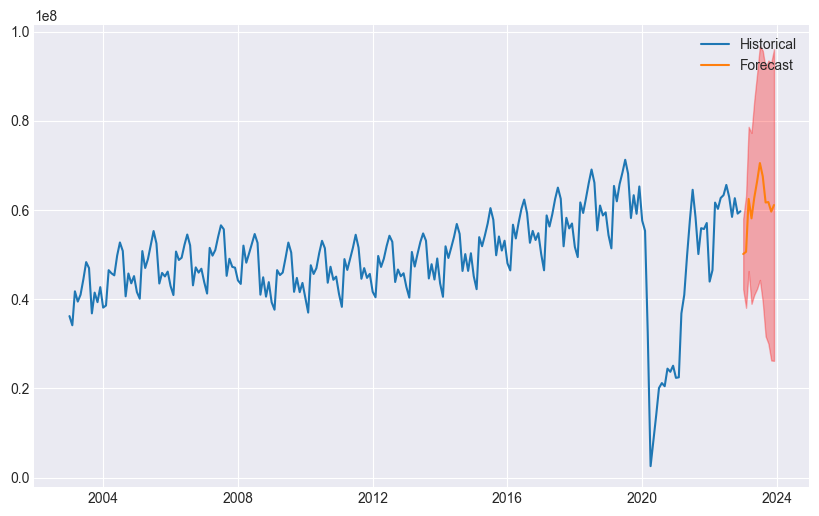

In [43]:
# plotting the forecast w the historicical data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Dom_RPM'], label='Historical')
plt.plot(pd.date_range(train.index[-1], periods=n_periods, freq='M'), forecast_mean, label='Forecast')
plt.fill_between(pd.date_range(train.index[-1], periods=n_periods, freq='M'), forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.show()


In [44]:
# lets compare our forecast w the test

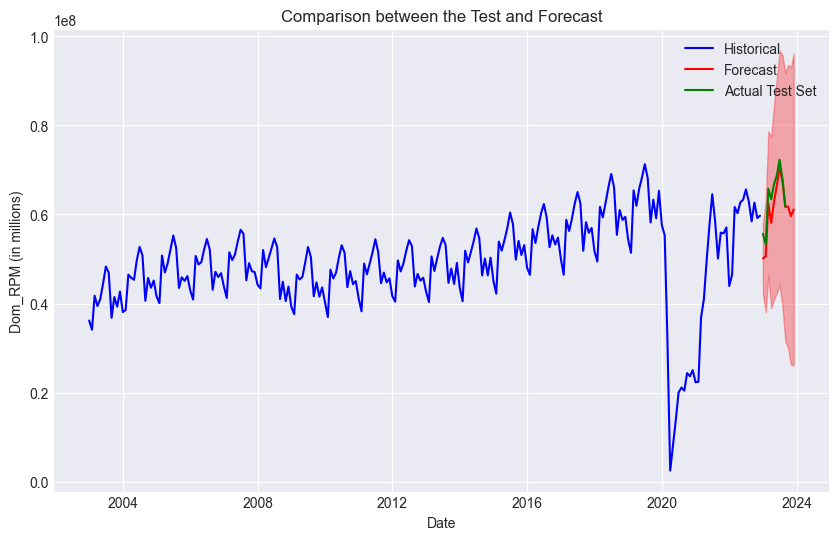

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Dom_RPM'], label='Historical', color='blue')
# forecast
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
# let's fill w  in the confidence interval
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
# test set
plt.plot(test.index, test['Dom_RPM'], label='Actual Test Set', color='green')

plt.title('Comparison between the Test and Forecast')
plt.xlabel('Date')
plt.ylabel('Dom_RPM (in millions)')
plt.legend()
plt.show()